<a href="https://colab.research.google.com/github/nnaemekak39/ADS-assignment-3-Fitting-and-Clustering-/blob/main/My_Project(Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Housing Price Prediction Using Machine Learning

The objective of this project is in 3 manifolds:

1. Predictive Modelling: To develop a predictive model that can accurately estimate the market price of a house based on its characteristics like size, number of rooms/bath, location etc.

2. Comparative Analysis of Algorithms: Comparing Linear Regression, Support Vector Machine  Random Forest, and to identify the best performing model.

3. Understanding Price Determinants: To identify and understand the key factors that most significantly impact housing prices.

The dataset for this project was obtained from Kaggle.

In [1]:
### Importing necessary libraries for our prediction

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import warnings



In [2]:
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading in the dataset
data=pd.read_csv('housing_price_dataset.csv')
data


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


### Exploring the data to understand its features and attributes



In [4]:
# Checking basic information about the data

data.info()

# it can be deduced that the dataset contains 5000 rows and 6 columns, with 5 being of numerical data and 1 categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
# Checking for missing values
data.isna().sum()

# The dataset contains no missing values

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
# Checking for duplicate data in the dataset
data.duplicated().sum()
# No duplicated Values in the dataset

0

In [7]:
# Exploring the data descriptive statistics
data.describe()

# The min value in the price section has a negative value, thus indicating need to check outliers and unrealistic values as it
# is unsual to have a negative price figure

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [8]:
# Dropping the negative values in the price target class

### Visualising the Data to get a feel of it.

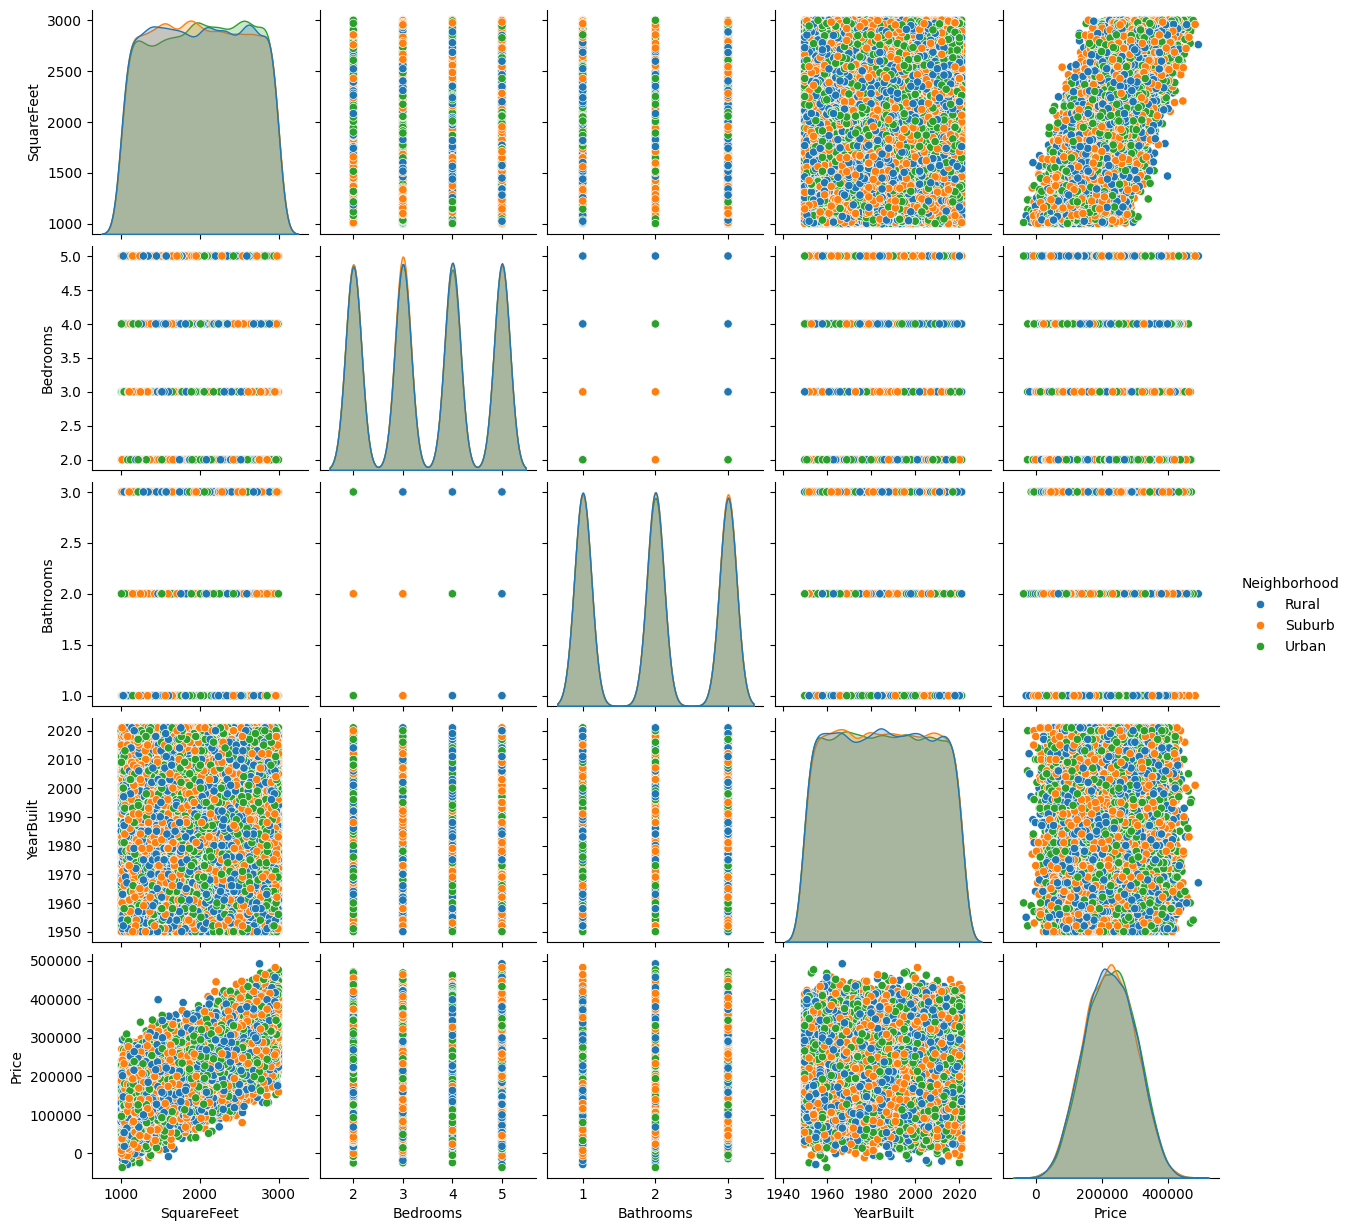

In [9]:
# Creating a pairplot to get an overview of the data visually

sns.pairplot(data, hue='Neighborhood')
plt.show()

# intuitively, from the visuals, it can be deduced that there is no outliers. However, this will be investigated further
# Also, this data cannot be 100% linearly separable from your visualizations

### Univariate Analysis: Explore the distribution of each variable separately

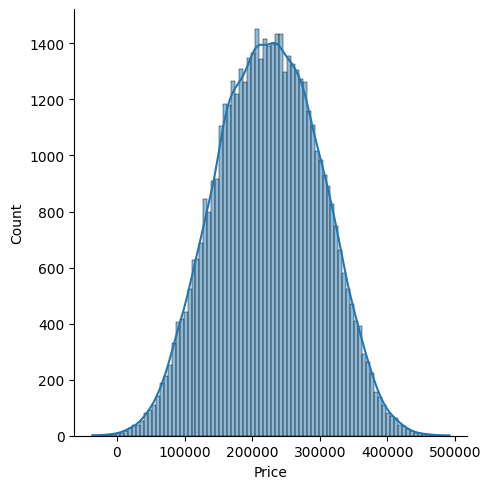

In [10]:
# Checking the distribution of the target class - Price

sns.displot(x='Price', data=data,  kde=True)
plt.show()

# The target class seems normally distributed

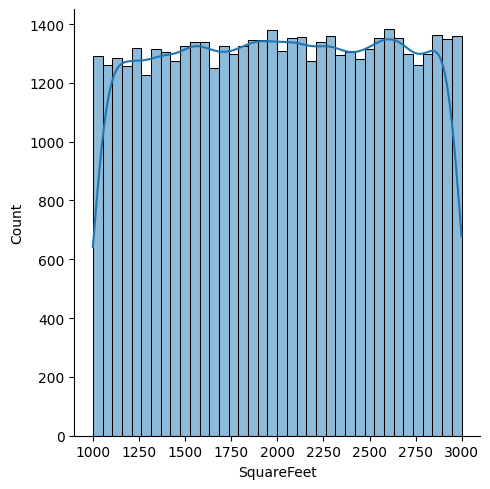

In [11]:
# Plotting the distribution of the Squarefeet Variable
sns.displot(x='SquareFeet', data=data,  kde=True)
plt.show()

# the squarefeet distribution is more or less uniform.

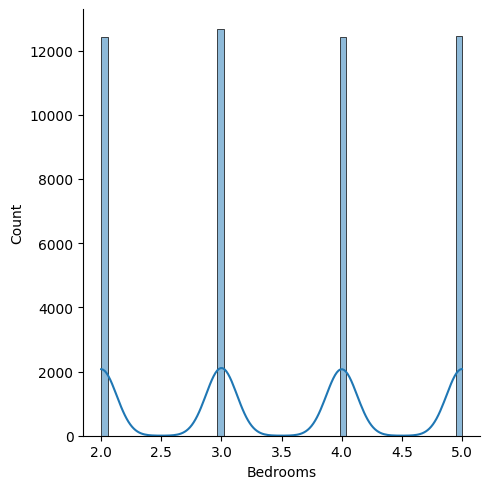

In [12]:
# Checking the distribution of the Bedrooms Variable
sns.displot(x='Bedrooms', data=data,  kde=True)
plt.show()

# the Bedroom distribution is more or less uniform.

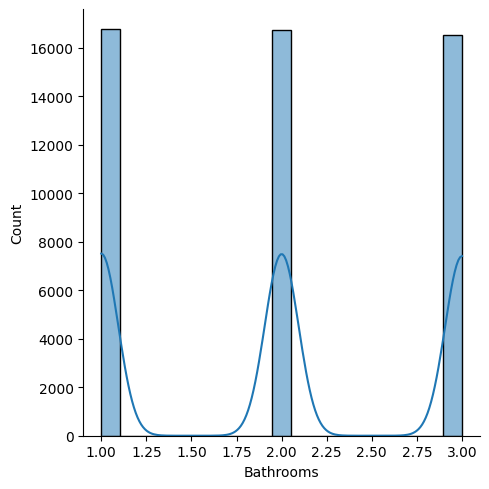

In [13]:
# Checking the distribution of the Bathroom Variable
sns.displot(x='Bathrooms', data=data,  kde=True)
plt.show()

# the Bathrooms distribution is more or less uniform.

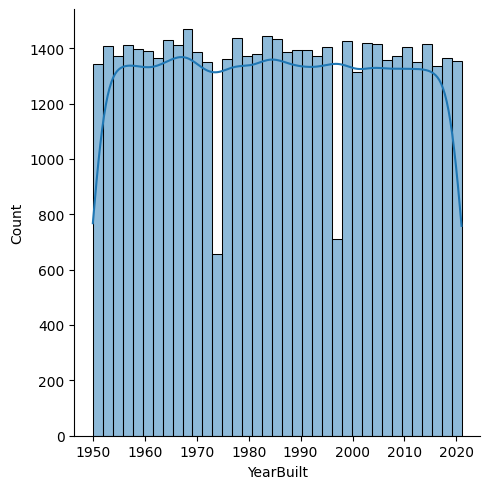

In [14]:
# Checking the distribution of the Yearbuilt Variable
sns.displot(x='YearBuilt', data=data,  kde=True)
plt.show()
# the Bathrooms distribution is more or less uniform.

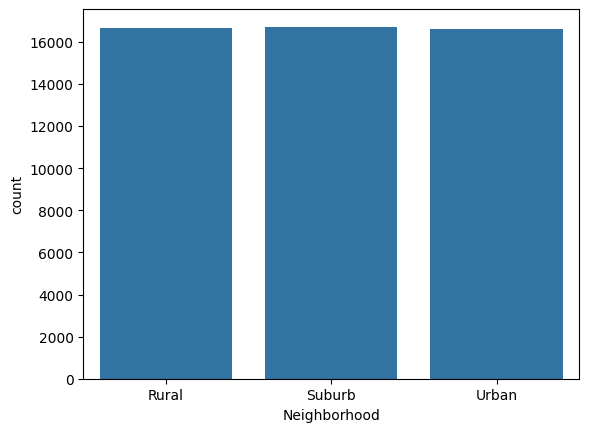

In [15]:
# Checking the distribution  of the Neighborhood
sns.countplot(x='Neighborhood', data=data)
plt.show()
# The distribution of the 3 Neighborhoods seems to be balanced

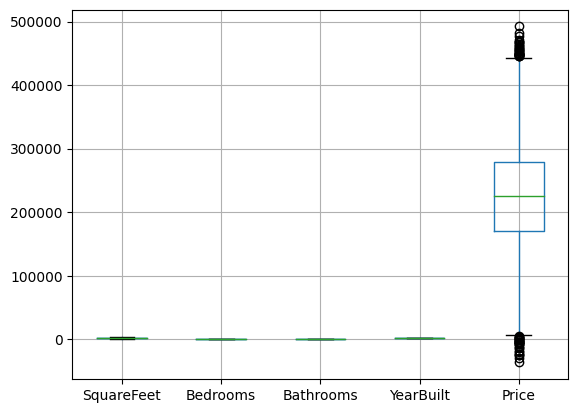

In [16]:
# Checking for Outliers in the data
data.boxplot()
plt.show()

# The boxplots suggest that only price  columns contains abnormally values, since it is the target class, one the negative values will be addressed

In [17]:
# Dealing with the Negative values in the target class by dropping them
data=data[data['Price']>0]
data.shape
# Having dropped the negative price values, the data now contains 49978 rows and 6 columns

(49978, 6)

## Bivariate Analysis: Analyzing relationships between pairs of variables.



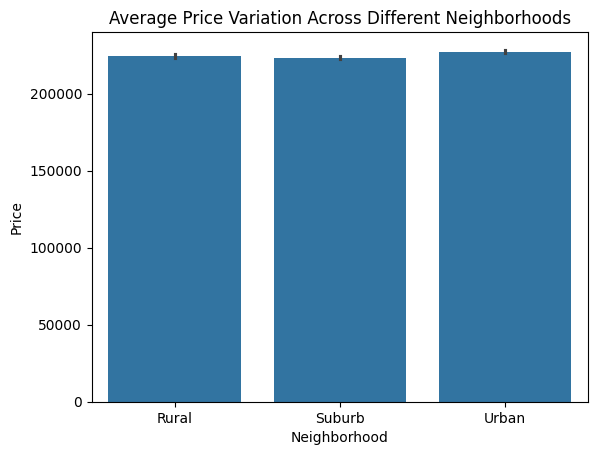

Neighborhood
Rural     224209.373282
Suburb    223302.967986
Urban     227297.857934
Name: Price, dtype: float64

In [18]:
# Analyzing relationships between Neighborhood and Price

sns.barplot(x="Neighborhood", data=data, y='Price')
plt.title('Average Price Variation Across Different Neighborhoods')
plt.show()

data.groupby('Neighborhood')['Price'].mean()

# The 'Urban' neighborhood tends to have slightly higher average  house prices compared to 'Rural' and 'Suburb'.
#'Rural' and 'Suburb' neighborhoods show relatively similar average or median prices

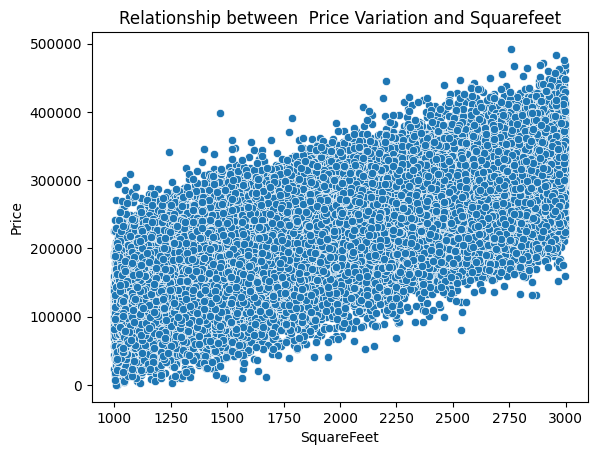

In [19]:
# explore the relationship between 'SquareFeet' and 'Price.
sns.scatterplot(x='SquareFeet',y='Price', data=data)
plt.title('Relationship between  Price Variation and Squarefeet')
plt.show()
# There seem to be a positive relationship between price of house and the squarefeet

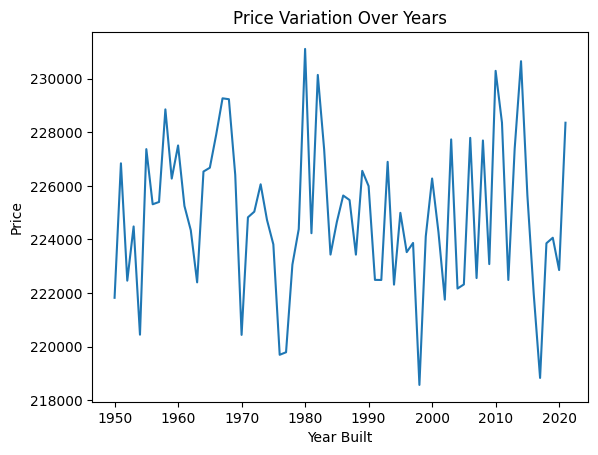

In [20]:
# explore the relationship between 'SquareFeet' and 'Price.
sns.lineplot(x='YearBuilt', y='Price', data=data, ci=None)
plt.title('Price Variation Over Years')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()
# There is significant fluctuation in price as time progresses.
# There appear to be no clear long-term upward or downward trend, but rather a series of peaks and troughs.

In [21]:
# Correlation Analyis
data.corr()

# There is a strong positive relationship between squarefeet and house price

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
SquareFeet,1.000000,-0.002568,-0.003381,0.000468,0.750656
Bedrooms,-0.002568,1.000000,0.007518,0.003167,0.072918
Bathrooms,-0.003381,0.007518,1.000000,0.003815,0.028322
YearBuilt,0.000468,0.003167,0.003815,1.000000,-0.002289
Price,0.750656,0.072918,0.028322,-0.002289,1.000000


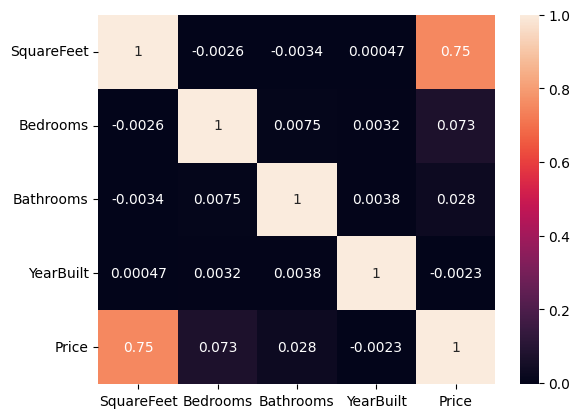

In [22]:
## Visualizing the correlation using heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data Preprocessing



In [23]:
# Encoding the Neighborhood column to a numerical format

data = data.copy()
encoder=LabelEncoder()
data.loc[:, 'Neighborhood'] = encoder.fit_transform(data['Neighborhood'])

<ipython-input-23-1a7c562e7b28>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'Neighborhood'] = encoder.fit_transform(data['Neighborhood'])


In [24]:
# Separating the data into dependent and independent variable
x=data.drop('Price', axis=1)
y= data['Price']

In [25]:
# Splitting the data into train and testing data using the ratio 80:20
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Standardizing the data to be on the same scale using standard scaler
scaler=StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Feature Selection
Finding the most 3 important features in a dataset for predicting price.
In this project, the Recursive feature Elimination model and Lasso model will be utilized to find the 3 most important features

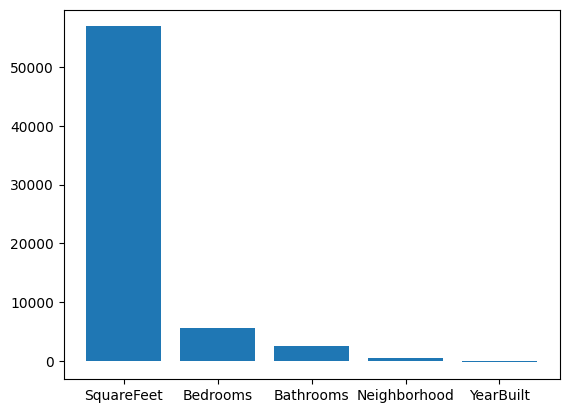

In [27]:
# Applying Lasso Algorithim for feature selection
lasso=Lasso()
lasso_coef=lasso.fit(x_train_scaled,y_train).coef_
plt.bar(x_train.columns,lasso_coef)
plt.show()

In [28]:
# Applying RFE Algorithim for feature selection on a Linear Regression Model
rfe_lr=RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe_lr.fit(x_train_scaled,y_train)
x.columns[rfe_lr.support_]

# The 3 most important features for Linear Regression using RFE
x_train.iloc[:,rfe_lr.support_].head()

,SquareFeet,Bedrooms,Bathrooms
47288,2897,4,3
30259,1225,3,2
26509,1282,3,1
18128,2549,4,2
24076,1125,3,2


In [29]:
# Applying RFE Algorithim for feature selection on a Support Vector Model
rfe_svr=RFE(estimator=SVR(kernel='linear'), n_features_to_select=3)
rfe_svr.fit(x_train_scaled,y_train)
x.columns[rfe_svr.support_]

# The 3 most important features for support vector machine using RFE
x_train.iloc[:,rfe_svr.support_].head()

,SquareFeet,Bedrooms,Bathrooms
47288,2897,4,3
30259,1225,3,2
26509,1282,3,1
18128,2549,4,2
24076,1125,3,2


In [30]:
# Applying RFE Algorithim for feature selection on a Support Vector Model
rfe_rf=RFE(estimator=RandomForestRegressor(), n_features_to_select=3)
rfe_rf.fit(x_train_scaled,y_train)
x.columns[rfe_rf.support_]

# The 3 most important features for Random Forest Regression using RFE
x_train.iloc[:,rfe_rf.support_].head()

,SquareFeet,Neighborhood,YearBuilt
47288,2897,1,2012
30259,1225,1,1957
26509,1282,2,1961
18128,2549,0,1979
24076,1125,0,1960


## Model Building Using All Features

Next is to  build  Linear Regression, Support Vector Machine and Random Forest Models to predict the prices using all features in the dataset

#### Building a Linear Regression Model

In [31]:
# instantiating the Linear Regression Model
lr=LinearRegression()

# Fitting the Model to the training data
lr.fit(x_train_scaled,y_train)

# Making prediction on the test data
lr_prediction =lr.predict(x_test_scaled)

# Evaluating the model prediction
lr_R2=metrics.r2_score(y_test, lr_prediction)

print(f'Linear Regression R2 is {lr_R2}, meaning 57.7% variation in the price of house is explained by the independent variables')
print(f'RMSE is {metrics.mean_squared_error(y_test,lr_prediction, squared=False)}, indicates that the model has an average prediction error of this magnitude when estimating house prices ')
print(f'MAE is {metrics.mean_absolute_error(y_test,lr_prediction)}')


Linear Regression R2 is 0.5778358738000487, meaning 57.7% variation in the price of house is explained by the independent variables
RMSE is 49448.44617108399, indicates that the model has an average prediction error of this magnitude when estimating house prices 
MAE is 39495.14781153473


#### Building a Support Vector Machine Model

In [32]:
# instantiating Support Vector Machine  Model
sv=SVR(kernel='linear')

# Fitting the Model to the training data
sv.fit(x_train_scaled,y_train)

# Making prediction on the test data
sv_prediction =sv.predict(x_test_scaled)

# Evaluating the model prediction
sv_R2 =metrics.r2_score(y_test, sv_prediction)

print(f'Support Vector Regression R2 is {sv_R2}')
print(f'RMSE is {metrics.mean_squared_error(y_test,sv_prediction, squared=False)}, indicates that the model has an average prediction error of this magnitude when estimating house prices ')
print(f'MAE is {metrics.mean_absolute_error(y_test,sv_prediction)}')


Support Vector Regression R2 is 0.3349577467047339
RMSE is 62063.548910174286, indicates that the model has an average prediction error of this magnitude when estimating house prices 
MAE is 50101.830333546146


### Building a Random Forest Model

In [33]:
# instantiating the Random Forest  Model
rf=RandomForestRegressor()

# Fitting the Model to the training data
rf.fit(x_train_scaled,y_train)

# Making prediction on the test data
rf_prediction =rf.predict(x_test_scaled)

# Evaluating the model prediction
rf_R2=metrics.r2_score(y_test, rf_prediction)

print(f'Random Forest Regression R2 is {rf_R2}')
print(f'RMSE is {metrics.mean_squared_error(y_test,rf_prediction, squared=False)}, indicates that the model has an average prediction error of this magnitude when estimating house prices ')
print(f'MAE is {metrics.mean_absolute_error(y_test,rf_prediction)}')

Random Forest Regression R2 is 0.5228888267657846
RMSE is 52568.03941954403, indicates that the model has an average prediction error of this magnitude when estimating house prices 
MAE is 41900.176804104434


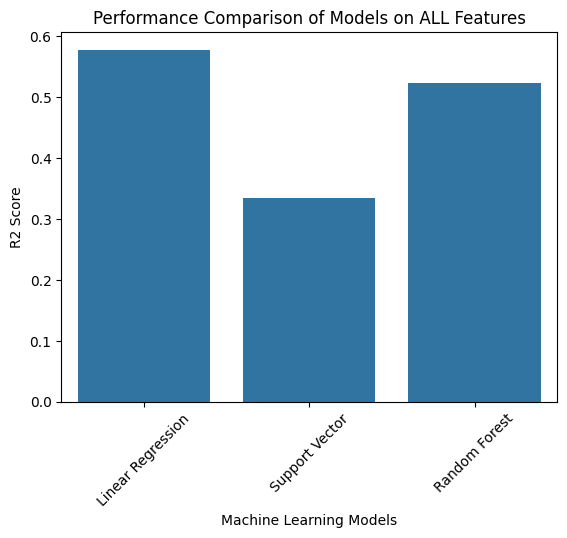

In [35]:
# Comparing Model Performance on All Features

a = ['Linear Regression', 'Support Vector', 'Random Forest']
b = [lr_R2, sv_R2, rf_R2]

data = pd.DataFrame({'Machine Learning Models': a, 'R2 Score': b})

# Plot using seaborn
sns.barplot(x='Machine Learning Models', y='R2 Score', data=data)
plt.xlabel('Machine Learning Models')
plt.ylabel('R2 Score')
plt.title('Performance Comparison of Models on ALL Features')
plt.xticks(rotation=45)  # Optional: Rotate labels to prevent overlap
plt.show()

## Model Building Using the 3 Important Features
Next is to  build  Linear Regression, Support Vector Machine and Random Forest Models to predict the prices using the selected 3 important  features in the dataset

#### Building a Linear Regression Model Using its 3 important Features

In [36]:
# instantiating the Linear Regression Model on the RFE algorithim
rfe_lr=RFE(estimator=LinearRegression(), n_features_to_select=3)

# Fitting the Model to the training data
rfe_lr.fit(x_train_scaled,y_train)

# Making prediction on the test data using the 3 important features
rfe_lr_prediction =rfe_lr.predict(x_test_scaled)

# Evaluating the model prediction
rfe_lr_R2=metrics.r2_score(y_test, rfe_lr_prediction)

print(f'Linear Regression R2 is {rfe_lr_R2}')
print(f'RMSE is {metrics.mean_squared_error(y_test,rfe_lr_prediction, squared=False)}')
print(f'MAE is {metrics.mean_absolute_error(y_test,rfe_lr_prediction)}')

Linear Regression R2 is 0.5776950708108431
RMSE is 49456.6916710605
MAE is 39510.03561524463


#### Building a Support Vector Regression Model Using its 3 selected  important Features

In [37]:
# instantiating the Support Vector Regression Model on the RFE algorithim
rfe_svr=RFE(estimator=SVR(kernel='linear'), n_features_to_select=3)

# Fitting the Model to the training data
rfe_svr.fit(x_train_scaled,y_train)

# Making prediction on the test data using the 3 important features
rfe_svr_prediction =rfe_svr.predict(x_test_scaled)

# Evaluating the model prediction
rfe_svr_R2_=metrics.r2_score(y_test, rfe_svr_prediction)

print(f'Support Vector R2 is {rfe_svr_R2_}')
print(f'RMSE is {metrics.mean_squared_error(y_test,rfe_svr_prediction, squared=False)}')
print(f'MAE is {metrics.mean_absolute_error(y_test,rfe_svr_prediction)}')

Support Vector R2 is 0.3348527715607561
RMSE is 62068.44699963526
MAE is 50104.313024239564


#### Building a Random Forest Regression Model Using its 3 selected  important Features


In [38]:
# instantiating the Random Regression Model on the RFE algorithim
rfe_rf=RFE(estimator=RandomForestRegressor(), n_features_to_select=3)

# Fitting the Model to the training data
rfe_rf.fit(x_train_scaled,y_train)

# Making prediction on the test data using the 3 important features
rfe_rf_prediction =rfe_rf.predict(x_test_scaled)

# Evaluating the model prediction
rfe_rf_R2_=metrics.r2_score(y_test, rfe_rf_prediction)


print(f'Random Forest R2 is {rfe_rf_R2_}')
print(f'RMSE is {metrics.mean_squared_error(y_test,rfe_rf_prediction, squared=False)}')
print(f'MAE is {metrics.mean_absolute_error(y_test,rfe_rf_prediction)}')

Random Forest R2 is 0.4737791750639181
RMSE is 55207.23567557974
MAE is 44060.97857013349


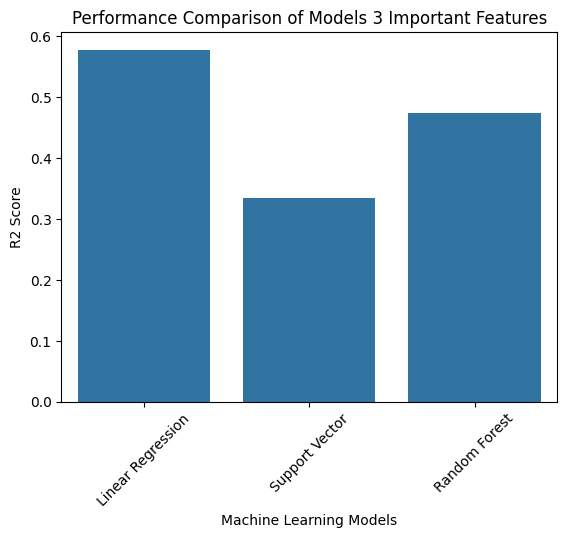

In [41]:
# Comparing Model Performance on 3 Important Features Selected

c = ['Linear Regression', 'Support Vector', 'Random Forest']
d = [rfe_lr_R2, rfe_svr_R2_, rfe_rf_R2_]

data = pd.DataFrame({'Machine Learning Models': c, 'R2 Score': d})

# Plot using seaborn
sns.barplot(x='Machine Learning Models', y='R2 Score', data=data)
plt.xlabel('Machine Learning Models')
plt.ylabel('R2 Score')
plt.title('Performance Comparison of Models 3 Important Features')
plt.xticks(rotation=45)  # Optional: Rotate labels to prevent overlap
plt.show()